# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student.

In [ ]:
# stundent details example: John S. 9812
#           student details 1: Nitzan C 8126
#           student details 2: Aviv H 7600
#           student details 3: Hila H 0854

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: chatgpt
Goal:
Propmpt1: how do i connect colab to git hub? does the notebook update automatically on both sides?
    
Propmpt2: which visualization shows if the data is balanced
    
Propmpt3: show me how to use logistic regression and whats the differences betwween random forest
Propmpt4: how to use a confusion matrix to understand the model execution?
Propmpt5: Can you explain how GridSearchCV works in sklearn? how does KFold uses it
Propmpt6: what does the macrof1 value shows?

AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3:

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

The dataset focuses on classifying different types of wine based on their chemical and physical properties, such as alcohol percentage, acidity, magnesium, phenols, and color intensity. The task is a multi-class classification problem, where the goal is to train a supervised learning model that can predict the correct wine type from these features.
    
</pre>

## Part 2 - Initial Preparations
You could add as many code cells as needed

In [ ]:
# data preperation and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("wine_train.csv")
test_df = pd.read_csv("wine_test.csv")

print("Train Data:")
display(train_df.head())
print("Test Data:")
display(test_df.head())

Train Data:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


Test Data:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


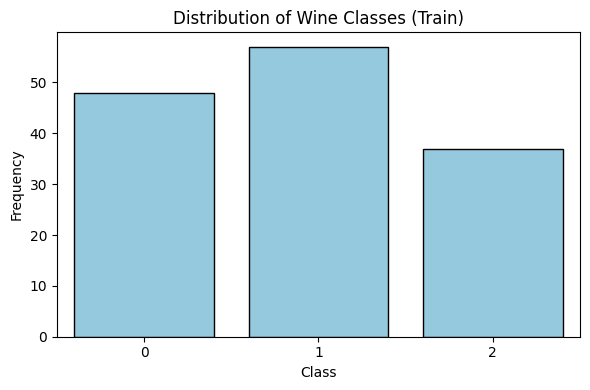

In [ ]:
# This plot shows the distribution of wine classes in the training set. it shows if its balanced or if some classes dominate, which can affect the model.

plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x="target", color="skyblue", edgecolor="black")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Distribution of Wine Classes (Train)")
plt.tight_layout()
plt.show()


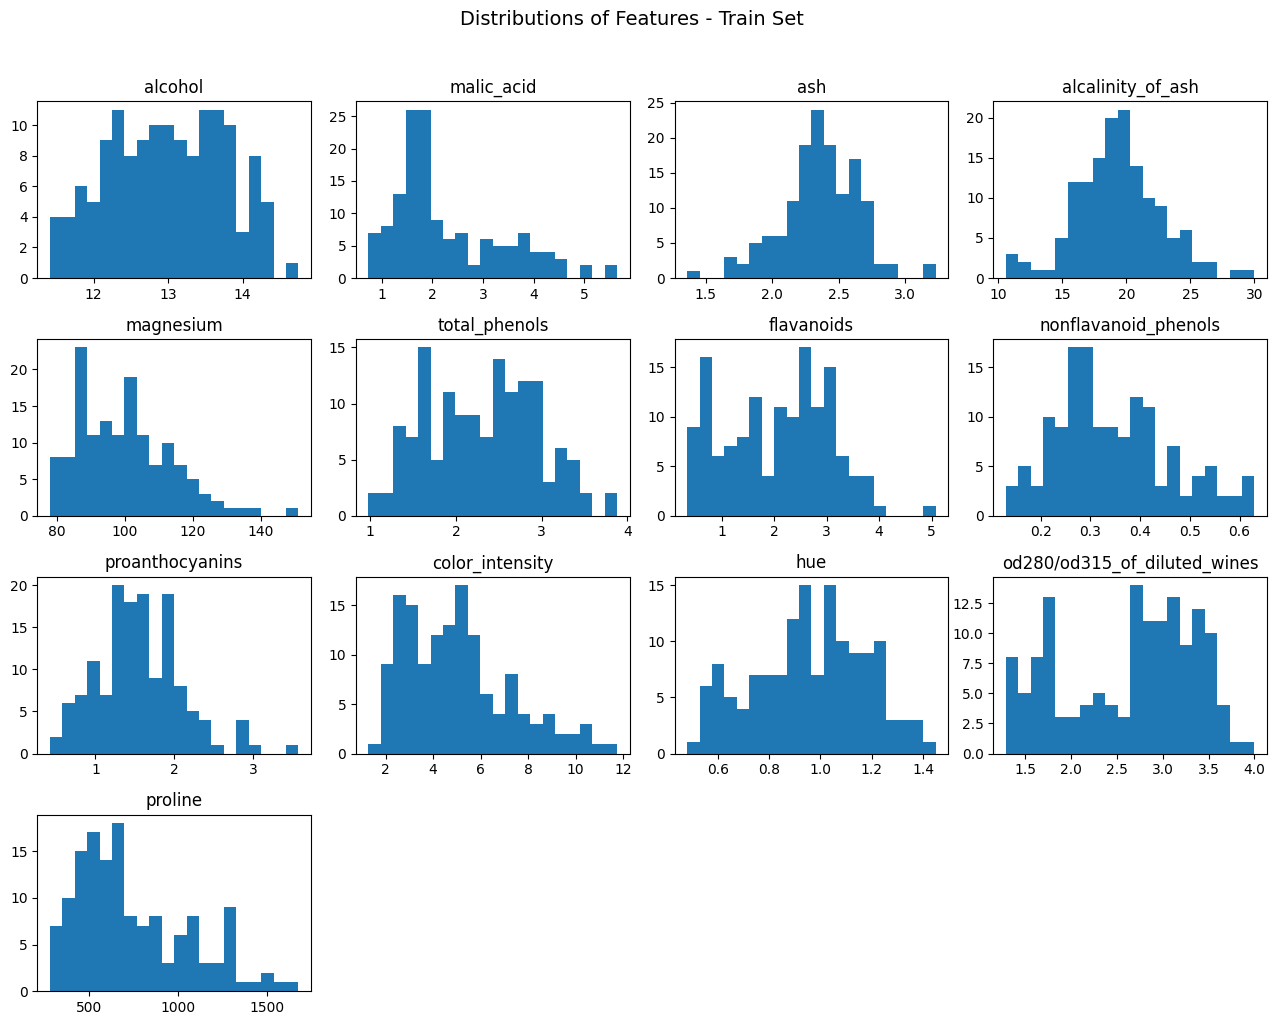

In [ ]:
# Provides a global overview of all feature distributions. it helps to detect outliers

features = train_df.loc[:, train_df.columns != "target"]

ax_array = features.hist(bins=20, figsize=(13,10), grid=False)
plt.suptitle("Distributions of Features - Train Set", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()



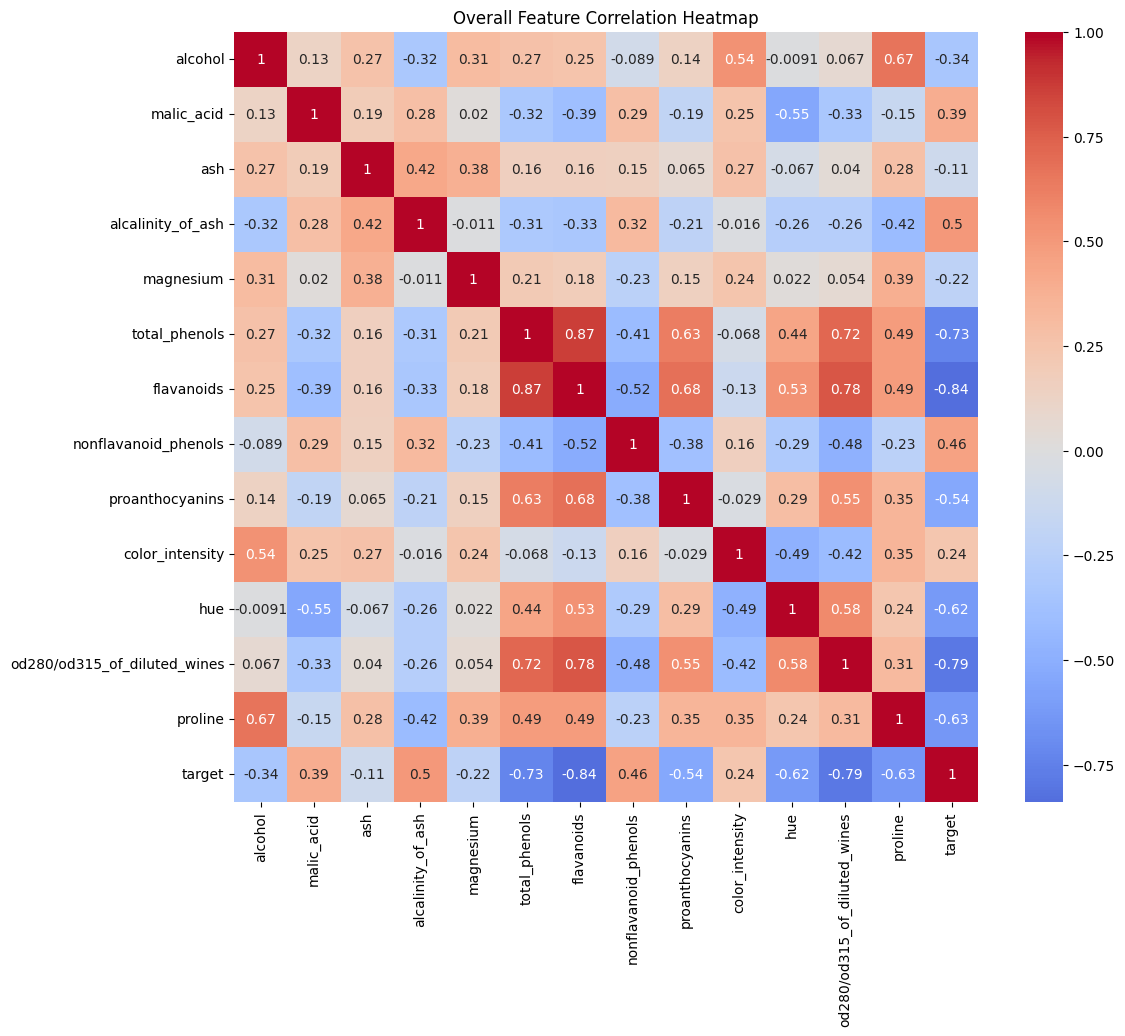

In [ ]:
# Shows global correlations between all features in the dataset. It helps us to identify overall data structure.
plt.figure(figsize=(12,10))
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True)
plt.title("Overall Feature Correlation Heatmap")
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [ ]:

import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Split features and target
target_col = "target"
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]


In [ ]:
# Base pipeline: scaler -> selector -> classifier
pipe = Pipeline(steps=[
    ("scaler", "passthrough"),
    ("select", "passthrough"),
    ("clf", LogisticRegression())
])


In [ ]:
# Logistic Regression parameter grid
param_grid_lr = {
    "scaler": [StandardScaler(), MinMaxScaler()],
    "select": [
        "passthrough",
        SelectKBest(score_func=f_classif, k=5),
        SelectKBest(score_func=mutual_info_classif, k=5)
    ],
    "clf": [LogisticRegression(max_iter=500, random_state=42)],
    "clf__C": [0.1, 1.0, 10.0],
    "clf__solver": ["lbfgs"]
}


In [ ]:
# Random Forest parameter grid
param_grid_rf = {
    "scaler": ["passthrough"],
    "select": [
        "passthrough",
        SelectKBest(score_func=f_classif, k=5),
        SelectKBest(score_func=mutual_info_classif, k=5)
    ],
    "clf": [RandomForestClassifier(random_state=42)],
    "clf__n_estimators": [150, 250],
    "clf__max_depth": [None, 6, 10],
    "clf__min_samples_split": [2, 4]
}


In [ ]:
# Combine grids
param_grids = [param_grid_lr, param_grid_rf]


In [ ]:
# 5-fold CV setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grids,
    cv=cv,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)


In [ ]:
# Run search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', 'passthrough'),
                                       ('select', 'passthrough'),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'clf': [LogisticRegression(max_iter=500,
                                                     random_state=42)],
                          'clf__C': [0.1, 1.0, 10.0], 'clf__solver': ['lbfgs'],
                          'scaler': [StandardScaler(), MinMaxScaler()],
                          'select':...
                                                 score_func=<function mutual_info_classif at 0x7b729ab0f920>)]},
                         {'clf': [RandomForestClassifier(random_state=42)],
                          'clf__max_depth': [None, 6, 10],
                          'clf__min_samples_split': [2, 4],
                          'clf__n_estimators': [150, 250],
                          'scaler': ['passthrough'],
                          'select': ['passthrough', SelectKBest(k=5),
                                     SelectKBest(k=5,
                                                 score_func=<function mutual_info_classif at 0x7b729ab0f920>)]}],
             scoring='f1_macro', verbose=1)

In [ ]:
print("\n==================== RESULTS (CV) ====================")
print(f"Best CV macro-F1: {grid.best_score_:.4f}")
print("Best Params:")
for k, v in grid.best_params_.items():
    print(f"  {k}: {v}")


==================== RESULTS (CV) ====================
Best CV macro-F1: 0.9785
Best Params:
  clf: RandomForestClassifier(random_state=42)
  clf__max_depth: None
  clf__min_samples_split: 2
  clf__n_estimators: 150
  scaler: passthrough
  select: passthrough


In [ ]:
# Full CV results table
cv_results_df = pd.DataFrame(grid.cv_results_).sort_values("mean_test_score", ascending=False)

cols_to_show = [
    "rank_test_score", "mean_test_score", "std_test_score",
    "param_clf", "param_scaler", "param_select",
    "param_clf__C", "param_clf__solver",
    "param_clf__n_estimators", "param_clf__max_depth", "param_clf__min_samples_split"
]
cols_to_show = [c for c in cols_to_show if c in cv_results_df.columns]

display(cv_results_df[cols_to_show].head(15))

,rank_test_score,mean_test_score,std_test_score,param_clf,param_scaler,param_select,param_clf__C,param_clf__solver,param_clf__n_estimators,param_clf__max_depth,param_clf__min_samples_split
18,1,0.978451,0.043097,RandomForestClassifier(random_state=42),passthrough,passthrough,NaN,NaN,150.0,None,2.0
48,1,0.978451,0.043097,RandomForestClassifier(random_state=42),passthrough,passthrough,NaN,NaN,150.0,10,4.0
42,1,0.978451,0.043097,RandomForestClassifier(random_state=42),passthrough,passthrough,NaN,NaN,150.0,10,2.0
36,1,0.978451,0.043097,RandomForestClassifier(random_state=42),passthrough,passthrough,NaN,NaN,150.0,6,4.0
30,1,0.978451,0.043097,RandomForestClassifier(random_state=42),passthrough,passthrough,NaN,NaN,150.0,6,2.0
24,1,0.978451,0.043097,RandomForestClassifier(random_state=42),passthrough,passthrough,NaN,NaN,150.0,None,4.0
0,7,0.976572,0.030208,"LogisticRegression(max_iter=500, random_state=42)",StandardScaler(),passthrough,0.1,lbfgs,NaN,NaN,NaN
6,8,0.975357,0.020284,"LogisticRegression(max_iter=500, random_state=42)",StandardScaler(),passthrough,1.0,lbfgs,NaN,NaN,NaN
45,9,0.972276,0.041758,RandomForestClassifier(random_state=42),passthrough,passthrough,NaN,NaN,250.0,10,2.0
33,9,0.972276,0.041758,RandomForestClassifier(random_state=42),passthrough,passthrough,NaN,NaN,250.0,6,2.0


In [ ]:
best_row = cv_results_df.iloc[0]
best_score = best_row["mean_test_score"] * 100
print(f"Best Model: {best_row['param_clf']}")
print(f"CV macro-F1: {best_score:.2f}%")
print("Best Params:")
for k, v in best_row.items():
    if str(k).startswith("param_clf__") and pd.notna(v):
        print(f"  - {k.split('__')[1]}: {v}")
print(f"  - scaler: {best_row['param_scaler']}")
print(f"  - select: {best_row['param_select']}")

Best Model: RandomForestClassifier(random_state=42)
CV macro-F1: 97.85%
Best Params:
  - min_samples_split: 2.0
  - n_estimators: 150.0
  - scaler: passthrough
  - select: passthrough


## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [ ]:
best_model = grid.best_estimator_

best_model.fit(X_train, y_train)

print("Final model trained on full training data.")
print("Best configuration from CV:")
print(grid.best_params_)

Final model trained on full training data.
Best configuration from CV:
{'clf': RandomForestClassifier(random_state=42), 'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 150, 'scaler': 'passthrough', 'select': 'passthrough'}


## Part 5 - Apply on test and show model performance estimation

First 5 predictions on test:


,y_true,y_pred
0,2,2
1,0,0
2,2,2
3,1,1
4,2,2



Best CV macro-F1 (from Part 3): 0.9785
Test macro-F1 (Part 5):         1.0000

Classification Report (per class):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



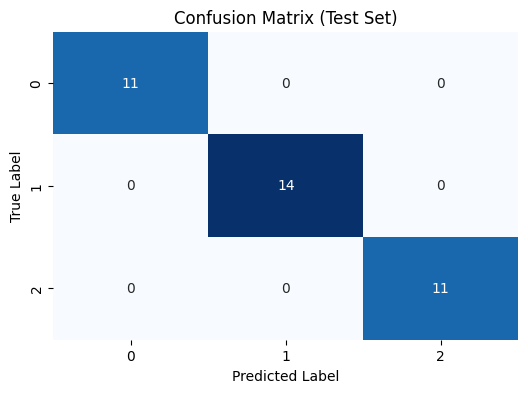

In [ ]:

from sklearn.metrics import classification_report, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Split test features and labels
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# 2) Predict ALL test samples using the best model (from Part 4)
y_pred = best_model.predict(X_test)

# 3) Show the first 5 predictions vs ground truth
first5 = pd.DataFrame({"y_true": y_test.values[:5], "y_pred": y_pred[:5]})
print("First 5 predictions on test:")
display(first5)

# 4) Show model quality: CV macro-F1 (from Part 3) vs Test macro-F1
test_f1 = f1_score(y_test, y_pred, average="macro")
print(f"\nBest CV macro-F1 (from Part 3): {grid.best_score_:.4f}")
print(f"Test macro-F1 (Part 5):         {test_f1:.4f}\n")

# 5) Detailed per-class report
print("Classification Report (per class):")
print(classification_report(y_test, y_pred))

# 6) Confusion Matrix (absolute numbers)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Set)")
plt.show()
